In [9]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data = pd.read_csv('census data/all_year_data.csv')
data['zip'] = '0' + data.zip.astype(str)

data_2015 = data.loc[data.year==2015]
data_2019 = data.loc[data.year==2019]

# Shapefile of Providence zipcode boundaries, collected from https://data.providenceri.gov/Reference/Zip-Codes/2d8k-gbfp
zipcodes = gpd.read_file('shapefiles/Zip Codes/geo_export_7b90692b-83fc-4198-a66c-777f7ea4963d.shp')

# zcta_2010_gdf = zipcodes.merge(data_2010, on="zip")
zcta_2015_gdf = zipcodes.merge(data_2015, on="zip")
zcta_2019_gdf = zipcodes.merge(data_2019, on="zip")

In [11]:
years = [2015, 2019]
# years = [2010, 2015, 2019]

for year in years:
    if year == 2015:
        gdf = zcta_2015_gdf
    else:
        gdf = zcta_2019_gdf

    # Average Time to Work, Overall
    fig,ax = plt.subplots(1,figsize=(10,6))
    gdf.plot(column='avg_time_agg',legend=True, cmap='YlOrRd',edgecolor='white',ax=ax,legend_kwds={'label':'Average Time to Work, Minutes'})
    ax.axis('off')
    ax.set_title(f'Average Travel Time to Work, {year}', fontdict={'fontsize': '15', 'fontweight' : '3'})
    fig.savefig(f'Visualizations/average_time_to_work_zip_{year}.png')
    plt.close()

    gdf[['zip','avg_time_agg','pct_workers_ctv']].sort_values(by='avg_time_agg',ascending=False).to_csv(f'Tables/average_time_to_work_zip_{year}.csv')

    # Percent workers who travel to work via car
    fig,ax = plt.subplots(1,figsize=(8,6))
    gdf.plot(column='pct_workers_ctv',legend=True, cmap='YlOrRd',edgecolor='black',ax=ax,legend_kwds = {'label':'% Workers'})
    ax.axis('off')
    ax.set_title(f'Percentage of workers who travel to work via car, {year}', fontdict={'fontsize': '15', 'fontweight' : '3'})
    fig.savefig(f'Visualizations/pct_workers_car_zipcode_{year}.png')
    plt.close()

    # Percent workers who travel to work via car
    fig,ax = plt.subplots(1,figsize=(8,6))
    labels = gdf['zip']
    pct = gdf['pct_workers_ctv']
    ax.bar(labels, pct, .35, label='% Car Commuters')
    ax.set_title(f'Percentage of workers who travel to work via car, {year}', fontdict={'fontsize': '15', 'fontweight' : '3'})
    ax.set_ylabel('% Workers')
    ax.set_xlabel('Zip Code')
    ax.legend(loc='upper right')
    fig.savefig(f'Visualizations/pct_workers_car_zipcode_bar_{year}.png')
    plt.close()

    # Housing Tenure
    fig, ax = plt.subplots(1,figsize=(8,6))
    labels = gdf['zip']
    renters = gdf['pct_renter_occupied_units']
    owners = gdf['pct_owner_occupied_units']
    ax.bar(labels, renters, .35, label='% Renter Occupied')
    ax.bar(labels, owners, .35, bottom=renters, label='% Owner Occupied')
    ax.set_ylabel('% Housing Tenure')
    ax.set_xlabel('Zip Code')
    ax.set_title(f'% Housing Tenure by Zip Code, {year}')
    ax.legend(loc='upper right')
    fig.savefig(f'Visualizations/housing_tenure_{year}.png')
    plt.close()

    gdf[['zip','pct_renter_occupied_units','pct_owner_occupied_units']].to_csv(f'Tables/housing_tenure_{year}.csv')

    # Median Household Income
    fig,ax = plt.subplots(1,figsize=(10,6))
    gdf.plot(column='mhi',legend=True, cmap='YlOrRd',edgecolor='black',ax=ax,legend_kwds ={'label': 'Median Household Income'})
    ax.axis('off')
    ax.set_title(f'Median Household Income by Zipcode, {year}', fontdict={'fontsize': '15', 'fontweight' : '3'})
    fig.savefig(f'Visualizations/median_income_{year}.png')
    plt.close()

    gdf[['zip','mhi']].rename(columns={'zip':'Zip Code', 'mhi': 'Median Household Income'}).to_csv(f'Tables/mhi_{year}.csv')

    # Percentage of Households Without a Car
    fig,ax = plt.subplots(1,figsize=(10,6))
    gdf.plot(x="zip", y="pct_households_no_car", kind="bar",figsize=(9,8),ax=ax)
    ax.legend(labels=['% Households'])
    ax.set_title(f"% Households Without a Car, {year}")
    ax.set_ylabel('% Households')
    ax.set_xlabel('Zip Code')
    fig.savefig(f'Visualizations/pct_households_no_car_{year}.png')
    plt.close()

    gdf[['zip','pct_households_no_car']].rename(columns={'zip':'Zip Code', 'pct_households_no_car': '% Households Without a Car'}).to_csv(f'Tables/pct_households_no_car_{year}.csv')

    # Car commute vs transit
    fig,ax = plt.subplots(1,figsize=(10,6))
    gdf[gdf.avg_travel_ctv.isna() == False].plot(x="zip", y=["avg_travel_ctv", "avg_travel_pt"], kind="bar",figsize=(9,8),ax=ax)
    ax.legend(labels=['Average time by car','Average time by public transport'])
    ax.set_title(f'Commute Time Difference, Car versus Transit, {year}')
    ax.set_ylabel('Commute Time, Minutes')
    ax.set_xlabel('Zip Code')
    fig.savefig(f'Visualizations/bar_chart_travel_time_modes_transport_{year}.png')
    plt.close()

    # White vs nonwhite residents
    fig, ax = plt.subplots(1,figsize=(8,6))
    labels = gdf['zip']
    white = gdf['pct_white']
    nonwhite = gdf['pct_nonwhite']
    ax.bar(labels, white, .35, label='% White')
    ax.bar(labels, nonwhite, .35, bottom=white, label='% Non White')
    ax.set_ylabel('% Population')
    ax.set_xlabel('Zip Code')
    ax.set_title(f'% White vs Nonwhite, {year}')
    ax.legend(loc='upper right')
    fig.savefig(f'Visualizations/white_v_nonwhite_{year}.png')
    plt.close()

    gdf[['zip','pct_white','pct_nonwhite']].rename(columns={'zip':'Zip Code', 'pct_white': '% White Residents', 'pct_nonwhite': '% Nonwhite Residents'}).to_csv(f'Tables/pct_white_v_nonwhite_{year}.csv')

    # Distribution of car ownership
    fig, ax = plt.subplots(1, figsize=(8,6))
    labels = gdf['zip']
    no_car = gdf['pct_households_no_car']
    one_car = gdf['pct_households_one_car']
    two_car = gdf['pct_households_two_cars']
    three_car = gdf['pct_households_three_cars']
    four_car = gdf['pct_households_four_more_cars']

    ax.bar(labels, no_car, .35, label='% No Car')
    ax.bar(labels, one_car, .35, bottom=no_car, label='% 1 Car')
    ax.bar(labels, two_car, .35, bottom=no_car+one_car, label='% 2 Cars')
    ax.bar(labels, three_car, .35, bottom=no_car+one_car+two_car, label='% 3 Cars')
    ax.bar(labels, four_car, .35, bottom=no_car+one_car+two_car+three_car, label="% 4+ cars")

    ax.set_ylabel('% Households')
    ax.set_xlabel('Zip Code')
    ax.set_title(f'% Car Availability, {year}')
    ax.legend(loc='upper right')
    fig.savefig(f'Visualizations/car_ownership_{year}.png')
    plt.close()
    
    gdf[['zip','pct_households_no_car','pct_households_one_car','pct_households_two_cars','pct_households_three_cars','pct_households_four_more_cars']].rename(columns={'zip':'Zip Code'}).to_csv(f'Tables/car_ownership_{year}.csv')


In [12]:
import numpy as np
test = zcta_2015_gdf[['zip','avg_time_agg','avg_travel_ctv','avg_travel_pt']].sort_values(by='avg_time_agg',ascending=False)
print(f'Average Travel Time to Work, Overall: = {np.average(test.avg_time_agg)}')
print(f'Average Travel Time to Work, Car, Truck, or Van: = {np.average(test.loc[test.avg_travel_ctv.isna()==False].avg_travel_ctv)}')
print(f'Average Travel Time to Work, Public Transportation: = {np.average(test.loc[test.avg_travel_pt.isna()==False].avg_travel_pt)}')

Average Travel Time to Work, Overall: = 22.038721183770257
Average Travel Time to Work, Car, Truck, or Van: = 20.60742410163792
Average Travel Time to Work, Public Transportation: = 44.765692800511935


In [13]:
# Convert to a DataFrame and render.
google_data = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTnDvWy-tH9hL8Gh6BoVTve_g1ueI_leMnmG8idP9fJ31AF99SmZhEmeirRjGsSWlK0nvsxtCEn6ZE6/pub?gid=523310976&single=true&output=csv')
google_data['zip'] = '0' + google_data['zip'].astype(str)

data2 = google_data.merge(zcta_2019_gdf,on='zip')

<AxesSubplot:>

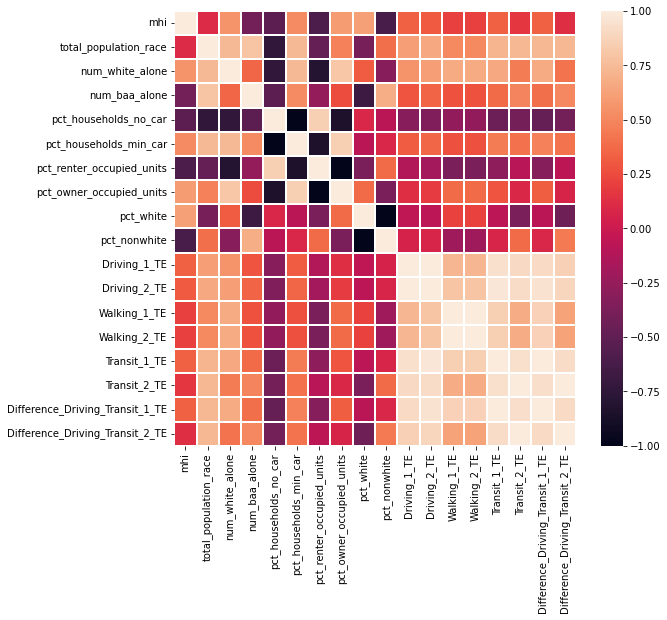

In [14]:
# Correlation Matrix
columns = ['zip','mhi','total_population_race','num_white_alone','num_baa_alone','pct_households_no_car','pct_households_min_car','pct_renter_occupied_units','pct_owner_occupied_units','pct_white','pct_nonwhite','Driving_1_TE','Driving_2_TE','Walking_1_TE','Walking_2_TE','Transit_1_TE','Transit_2_TE','Difference_Driving_Transit_1_TE','Difference_Driving_Transit_2_TE']
demographics_2019 = pd.DataFrame(data2, columns=columns)

corrmat= demographics_2019.corr()
f, ax = plt.subplots(figsize=(9,8))
sns.heatmap(corrmat,ax=ax,linewidths=.1)

In [25]:
prov_zips = list(zipcodes['zip'].values)
plt.scatter(zcta_2019_gdf['avg_time_agg'],zcta_2019_gdf['mhi'])
prov_zips

['02906', '02903', '02905', '02907', '02909', '02908', '02904']

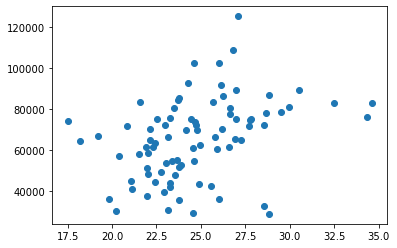

In [40]:
plt.scatter(data['avg_time_agg'],data['mhi'])

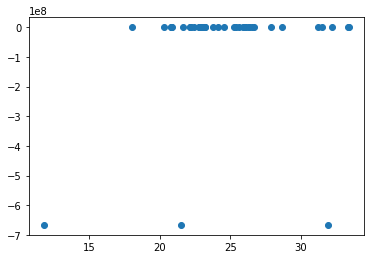

In [42]:
plt.scatter(data['avg_travel_ctv'],data['mhi'])

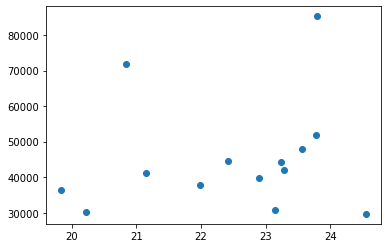

In [36]:
plt.scatter(data.loc[((data.zip.isin(prov_zips) == True)),'avg_time_agg'],data.loc[((data.zip.isin(prov_zips) == True)),'mhi'])

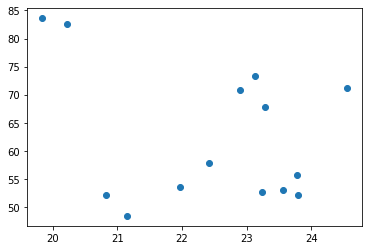

In [39]:
plt.scatter(data.loc[((data.zip.isin(prov_zips) == True)),'avg_time_agg'],data.loc[((data.zip.isin(prov_zips) == True)),'pct_renter_occupied_units'])